In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno

In [23]:
# !pip install missingno

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
!pwd

/gpfs52/home/wuy63/sp23-bridgestone-team7


In [3]:
ind = pd.read_csv("/./data/p_dsi/teams2023/bridgestone_data/data/individual.csv")
ind_sample = pd.read_csv("/./data/p_dsi/teams2023/bridgestone_data/data/individual_sample.csv")

## 1. Look at each feature and get a sense of what the features represent

In [6]:
ind.head()

,MZB_INDIV_ID,EMAIL_OPTIN_IND,AH1_RES_BUS_INDC,SUPP1_BUS_PANDER
0,251634500,N,R,N
1,251634501,N,R,N
2,251634502,N,R,N
3,251634503,N,R,N
4,251634504,N,R,N


In [7]:
ind_sample.head()

,Unnamed: 0,MZB_INDIV_ID,EMAIL_OPTIN_IND,AH1_RES_BUS_INDC,SUPP1_BUS_PANDER
0,5072954,277081528,Y,R,N
1,2302009,263098627,Y,R,N
2,12836285,369527724,Y,R,N
3,16337753,552976498,Y,R,N
4,14239232,464651569,Y,R,N


Without a data dictionary, I am guessing that MZB_INDIV_ID is the inidivual ID number (primary key). EMAIL_OPTIN_IND indicates whether the person is enrolled in the email promotion program where Y means they are, N means they are not. I don't have a single clue of what AH1_RES_BUS_INDC and SUPP1_BUS_PANDER represent.

## 2.  Create a table with descriptive statistics of the data

In [8]:
display(ind.shape)
display(ind_sample.shape)

(16834962, 4)

(100000, 5)

In [9]:
# TODO: add proportions to each of the follow table

In [10]:
pd.DataFrame(ind.groupby("EMAIL_OPTIN_IND", as_index = False).size(), columns = ["count"])

,count
EMAIL_OPTIN_IND,
N,5736334
U,1771616
Y,9327012


In [11]:
pd.DataFrame(ind.groupby("AH1_RES_BUS_INDC", as_index = False).size(), columns = ["count"])

,count
AH1_RES_BUS_INDC,
B,278761
R,10257423
U,847315


In [12]:
pd.DataFrame(ind.groupby("SUPP1_BUS_PANDER", as_index = False).size(), columns = ["count"])

,count
SUPP1_BUS_PANDER,
N,11332316
Y,51183


<AxesSubplot:xlabel='EMAIL_OPTIN_IND', ylabel='count'>

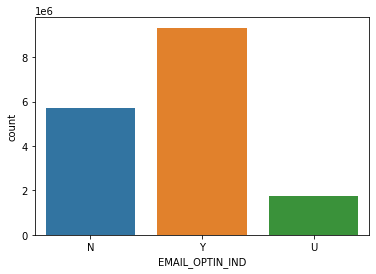

In [5]:
sns.countplot(x="EMAIL_OPTIN_IND", data=ind)

<AxesSubplot:xlabel='AH1_RES_BUS_INDC', ylabel='count'>

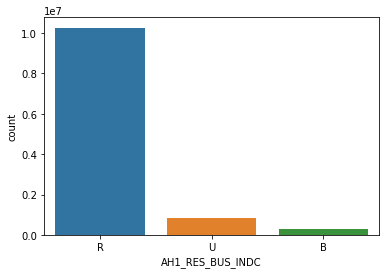

In [6]:
sns.countplot(x="AH1_RES_BUS_INDC", data=ind)

<AxesSubplot:xlabel='SUPP1_BUS_PANDER', ylabel='count'>

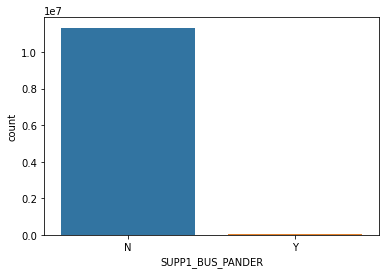

In [7]:
sns.countplot(x="SUPP1_BUS_PANDER", data=ind)

## 4. Create a missingness visualization

In [13]:
ind.isnull().sum()

MZB_INDIV_ID              0
EMAIL_OPTIN_IND           0
AH1_RES_BUS_INDC    5451463
SUPP1_BUS_PANDER    5451463
dtype: int64

In [14]:
ind_sample.isnull().sum()

Unnamed: 0          0
MZB_INDIV_ID        0
EMAIL_OPTIN_IND     0
AH1_RES_BUS_INDC    0
SUPP1_BUS_PANDER    0
dtype: int64

In [15]:
# msno.bar(ind)

In [16]:
ind_no_na = ind.dropna()

In [17]:
ind_no_na.shape

(11383499, 4)

In [18]:
ind_no_id = ind_no_na.drop("MZB_INDIV_ID", axis=1)

In [19]:
# sns.heatmap(ind_no_id, annot=True)